In [1]:
import numpy as np
import pandas as pd 
import tensorflow as tf 
import matplotlib.pyplot as plt 

%matplotlib inline 


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.utils import shuffle 

In [2]:
df = pd.read_csv('Data/sonar.all-data.csv')

In [3]:
df.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [4]:
df.describe()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,...,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,0.029208,0.038443,0.043837,0.054053,0.075105,0.104599,0.121591,0.134677,0.177361,0.208245,...,0.016034,0.013472,0.010729,0.010917,0.009300,0.008181,0.007771,0.007947,0.007936,0.006523
std,0.023038,0.033040,0.038521,0.046583,0.055669,0.059247,0.061897,0.085340,0.118311,0.134741,...,0.012027,0.009628,0.007071,0.007310,0.007103,0.005719,0.005756,0.006485,0.006196,0.005038
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013300,0.016400,0.018900,0.024450,0.037700,0.066950,0.080600,0.080350,0.096750,0.111150,...,0.008350,0.007350,0.005050,0.005350,0.004100,0.004400,0.003700,0.003600,0.003650,0.003100
50%,0.022800,0.030800,0.034200,0.044100,0.062000,0.092100,0.105600,0.111900,0.152200,0.181000,...,0.013800,0.011500,0.009600,0.009300,0.007500,0.006800,0.005900,0.005800,0.006300,0.005300
75%,0.035800,0.048100,0.058200,0.065700,0.101050,0.134150,0.153050,0.169800,0.231500,0.269000,...,0.020700,0.016750,0.014900,0.014450,0.012100,0.010350,0.010350,0.010400,0.010350,0.008550
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 61 columns):
0.0200    207 non-null float64
0.0371    207 non-null float64
0.0428    207 non-null float64
0.0207    207 non-null float64
0.0954    207 non-null float64
0.0986    207 non-null float64
0.1539    207 non-null float64
0.1601    207 non-null float64
0.3109    207 non-null float64
0.2111    207 non-null float64
0.1609    207 non-null float64
0.1582    207 non-null float64
0.2238    207 non-null float64
0.0645    207 non-null float64
0.0660    207 non-null float64
0.2273    207 non-null float64
0.3100    207 non-null float64
0.2999    207 non-null float64
0.5078    207 non-null float64
0.4797    207 non-null float64
0.5783    207 non-null float64
0.5071    207 non-null float64
0.4328    207 non-null float64
0.5550    207 non-null float64
0.6711    207 non-null float64
0.6415    207 non-null float64
0.7104    207 non-null float64
0.8080    207 non-null float64
0.6791    207 non-null floa

In [6]:
len(df.columns)

61

In [7]:
# Label distributions 

In [8]:
df['R'].value_counts()

M    111
R     96
Name: R, dtype: int64

In [9]:
# Data Preprocessing 

In [10]:
X = df[df.columns[0:60]].values

In [11]:
X.shape

(207, 60)

In [12]:
y = df['R'].values

In [13]:
y.shape

(207,)

In [14]:
# One Hot Encoder 

In [15]:

def one_hot_encoder(labels):
    n_lab = len(labels)
    n_unq_lab = len(np.unique(labels))
    one_hot_encode = np.zeros((n_lab, n_unq_lab))
    one_hot_encode[np.arange(n_lab), labels] = 1 
    return one_hot_encode


In [16]:
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)

Y = one_hot_encoder(y)

In [17]:
Y[0]

array([ 0.,  1.])

In [18]:
# Train and test data split 

In [19]:
X, Y = shuffle(X, Y, random_state = 0)

In [20]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.20, random_state = 0 )

In [21]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(165, 60)
(165, 2)
(42, 60)
(42, 2)


In [22]:
# ANN Modelling 

In [23]:
learning_rate = 0.2 
n_epoch = 500

In [24]:
n_dim = X.shape[1]
n_dim

60

In [25]:
n_class = 2

In [26]:
cost_history = np.empty(shape = [1], dtype = float)

In [27]:
hidden_1 = 60
hidden_2 = 60
hidden_3 = 60
hidden_4 = 60

In [28]:
x = tf.placeholder(tf.float32, [None, n_dim])
W = tf.Variable(tf.zeros([n_dim, n_class]))
b = tf.Variable(tf.zeros([n_class]))
y_ = tf.placeholder(tf.float32, [None, n_class])

In [29]:
x.shape

TensorShape([Dimension(None), Dimension(60)])

In [30]:
# NN Architecture (Computational graph)

def ml_p(x, weights, biases):
    
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.relu(layer_3)
    
    layer_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
    layer_4 = tf.nn.sigmoid(layer_4)
    
    out_layer = tf.add(tf.matmul(layer_4, weights['out']), biases['out'])
    
    return out_layer 
                     

In [31]:
# weight initializations 

weights = {
    'h1': tf.Variable(tf.truncated_normal([n_dim, hidden_1])),
    'h2': tf.Variable(tf.truncated_normal([hidden_1, hidden_2])),
    'h3': tf.Variable(tf.truncated_normal([hidden_2, hidden_3])),
    'h4': tf.Variable(tf.truncated_normal([hidden_3, hidden_4])),
    'out': tf.Variable(tf.truncated_normal([hidden_4, n_class]))
}

In [32]:
# biases init
biases = {
    'b1': tf.Variable(tf.truncated_normal([hidden_1])),
    'b2': tf.Variable(tf.truncated_normal([hidden_2])),
    'b3': tf.Variable(tf.truncated_normal([hidden_3])),
    'b4': tf.Variable(tf.truncated_normal([hidden_4])),
    'out': tf.Variable(tf.truncated_normal([n_class]))
}

In [33]:
init = tf.global_variables_initializer()

In [34]:
# calling model 
y = ml_p(x, weights, biases)

In [35]:
# Cost Function

In [37]:
cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = y, labels = y_))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

In [38]:
# Session

In [39]:
sess = tf.Session()
sess.run(init)

In [40]:
mse_history = []
accuracy_history = []

In [41]:
# Training Model


In [42]:
for epoch in range(n_epoch):
    sess.run(training_step, feed_dict = {x: train_x, y_: train_y})
    
    cost = sess.run(cost_function, feed_dict={x: train_x, y_: train_y})
    cost_history = np.append(cost_history, cost)
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    pred_y = sess.run(y, feed_dict = {x: test_x})
    
    mse = tf.reduce_mean(tf.square(pred_y - test_y))
    mse_ = sess.run(mse)
    mse_history.append(mse_)
    
    accuracy = (sess.run(accuracy, feed_dict={x: train_x, y_: train_y}))
    accuracy_history.append(accuracy)
    
    if epoch % 50 == 0:
        print('epoch : ', epoch, ' ; ', 'cost: ', cost, " ; MSE: ", mse_, "- Train Accuracy: ", accuracy )
 


epoch :  0  ;  cost:  1.16127  ; MSE:  6.1698443732 - Train Accuracy:  0.515152
epoch :  50  ;  cost:  0.766674  ; MSE:  2.56837345923 - Train Accuracy:  0.678788
epoch :  100  ;  cost:  0.726679  ; MSE:  9.57179776674 - Train Accuracy:  0.660606
epoch :  150  ;  cost:  0.424081  ; MSE:  6.83619815835 - Train Accuracy:  0.739394
epoch :  200  ;  cost:  0.451844  ; MSE:  5.89425675267 - Train Accuracy:  0.739394
epoch :  250  ;  cost:  0.559106  ; MSE:  5.0430948164 - Train Accuracy:  0.721212
epoch :  300  ;  cost:  0.281271  ; MSE:  6.37259284499 - Train Accuracy:  0.890909
epoch :  350  ;  cost:  0.577912  ; MSE:  8.02053905442 - Train Accuracy:  0.733333
epoch :  400  ;  cost:  0.16592  ; MSE:  8.27393270289 - Train Accuracy:  0.981818
epoch :  450  ;  cost:  0.399255  ; MSE:  6.54196822729 - Train Accuracy:  0.812121


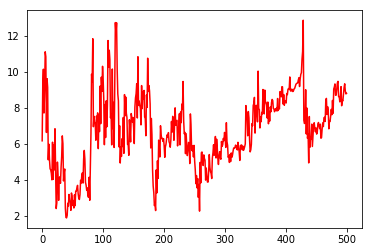

In [44]:
plt.plot(mse_history, 'r')
plt.show()

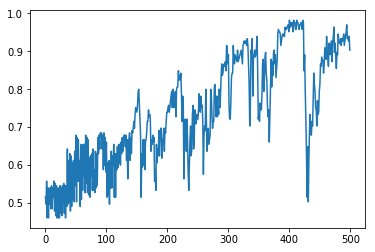

In [45]:
plt.plot(accuracy_history)
plt.show()

In [46]:
correction_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correction_prediction, tf.float32))
print("Test accuracy : ", (sess.run(accuracy, feed_dict = {x : test_x, y_ : test_y})))

Test accuracy :  0.880952


In [47]:
pred_y = sess.run(y, feed_dict = {x: test_x})
mse = tf.reduce_mean(tf.square(pred_y - test_y))
print("MSE : %.4f" % sess.run(mse))

MSE : 8.8120
